## Brain Tumor MRI Segmentation

In [1]:
#IMPORT THE BASIC LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil
import zipfile
import cv2
%matplotlib inline

## Destinguishing original image and mask image by visualization

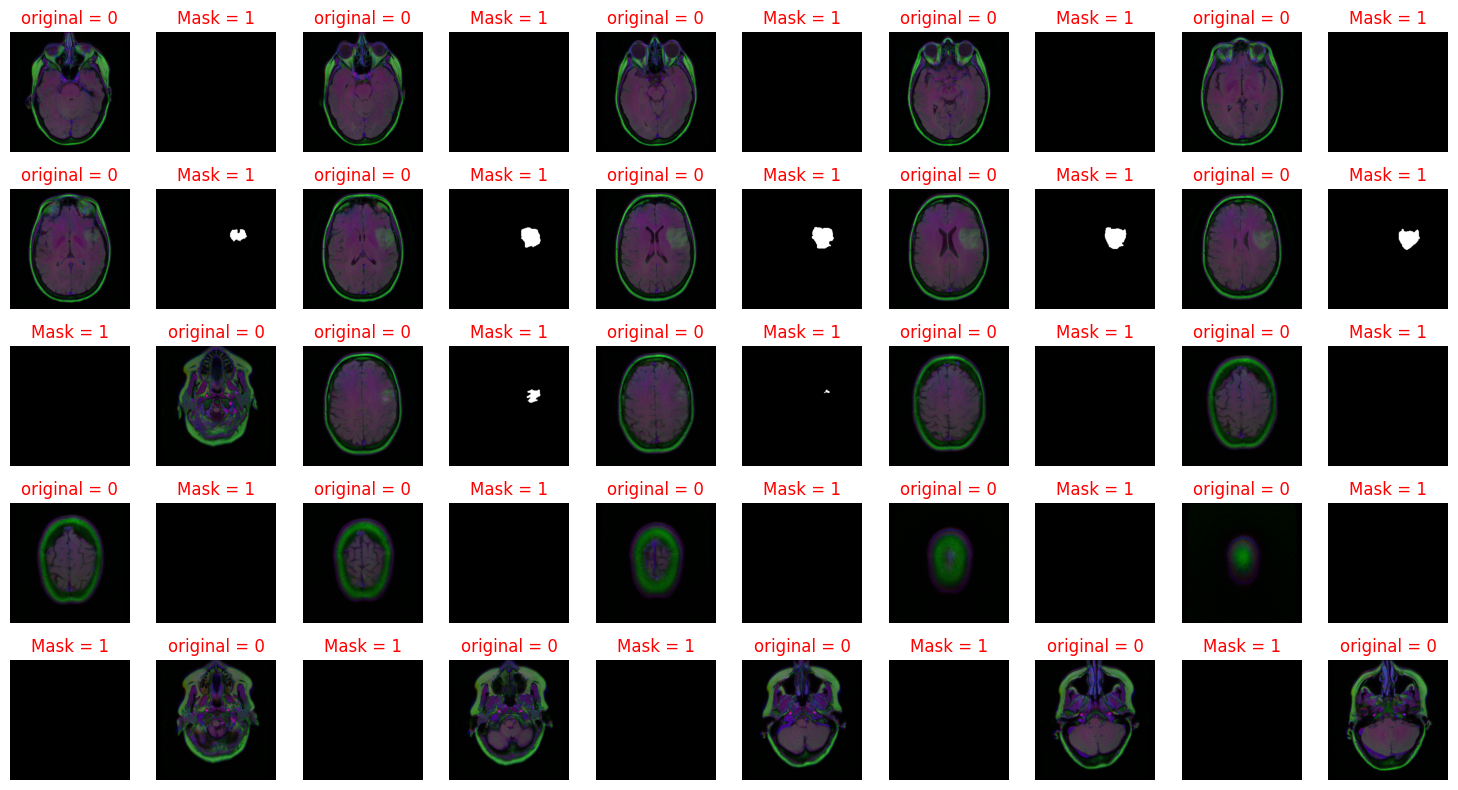

In [2]:

path = "kaggle_3m/"
first_imag = []
plot_imag = []
for file in os.listdir(path):
    if file == ".ipynb_checkpoints":
        continue
    pathway = os.path.join(path,file)
    first_imag.append(pathway)
for im in os.listdir(first_imag[10]):
    new_path = os.path.join(first_imag[10] + "/" + im)
    plot_imag.append(new_path)

plt.figure(figsize=(15,8))
for i, images in enumerate(plot_imag[1:51]):
    
    plt.subplot(5,10,i + 1)
    image = cv2.imread(images) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    
    plt.imshow(image)
    if images.lower().endswith("mask.tif"):
        title = "Mask = 1"
    else:
        title = "original = 0"
    plt.title(title,color = "red")
    plt.axis("off")
    plt.tight_layout()
plt.show();

## Labeling original and mask images to categorical var 1 and 0

In [3]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle

# Define constants
path = "kaggle_3m/"
image_width = 256
image_height = 256

# Initialize lists
X = []
y = []

for file in os.listdir(path):
    if file == ".ipynb_checkpoints":
        continue

    pathway = os.path.join(path, file)  # Fix indentation

    for file_path in os.listdir(pathway):
        if file_path == ".ipynb_checkpoints":
             continue
        imag = os.path.join(pathway, file_path)

        # Ensure the image exists before loading
        if not os.path.exists(imag):
            print(f"Warning: File {imag} not found.")
            continue

        # Read and preprocess the image
        imag_reader = cv2.imread(imag)
        if imag_reader is None:  # Skip corrupted images
            print(f"Skipping unreadable image: {imag}")
            continue

        imag_reader = cv2.cvtColor(imag_reader, cv2.COLOR_BGR2RGB)
        imag_reader = cv2.resize(imag_reader, (image_width, image_height), interpolation=cv2.INTER_CUBIC)
        imag_reader = imag_reader / 255.0  # Normalize pixel values

        # Append image and label
        X.append(imag_reader)
        label = 1 if "mask.tif" in file_path.lower() else 0
        y.append(label)

# Convert lists to NumPy arrays
x = np.array(X, dtype=np.float32)
Y = np.array(y, dtype=np.int32)

# Shuffle dataset
x_T, y_T = shuffle(x, Y, random_state=42)

# Print shapes for verification
print("Dataset shape:", x_T.shape, y_T.shape)


Dataset shape: (7692, 256, 256, 3) (7692,)


## Percentage of original and mask image

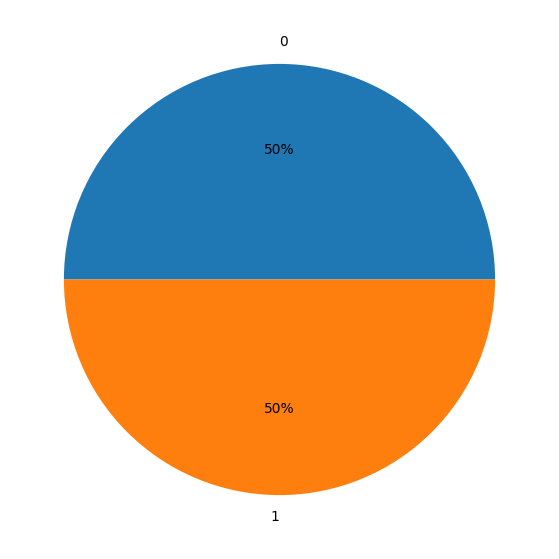

In [4]:
y_cat = y_T.astype(int)
lab, counts = np.unique(y_cat, return_counts = True)
plt.figure(figsize = (10,7))
plt.pie(counts,labels = lab, autopct = "%1.0f%%")
plt.show()


0.0

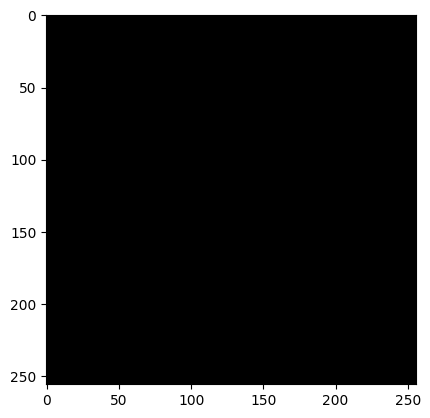

In [5]:
plt.imshow(x_T[7]);
x_T[7].max()

In [6]:
tumor_cell = []  
No_cell = []

for id_ in range(len(x_T)):
    
    if x_T[id_].max() == 1.0:
         cell = 1
         tumor_cell.append(cell)
        
    else:
        cel = 0
        No_cell.append(cel)  # Fixed typo

print(f"Tumor cells count: {len(tumor_cell)}")
print(f"No cells count: {len(No_cell)}")


Tumor cells count: 1488
No cells count: 6204


In [7]:
tumor_dict = {}
tumor_dict["No_cell"] = len(No_cell)
tumor_dict["tumor_cell"] = len(tumor_cell)
tumor_dict.values()

dict_values([6204, 1488])

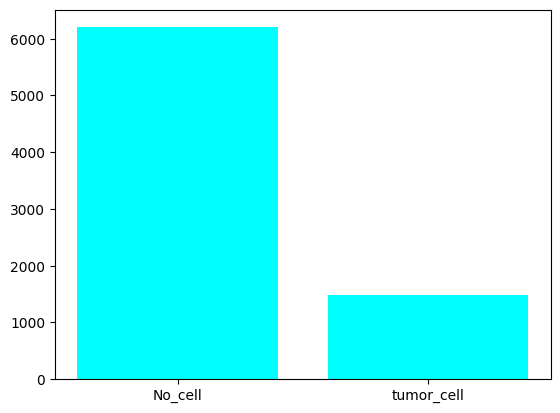

In [8]:
plt.bar(x = tumor_dict.keys(),height = tumor_dict.values(),color = "aqua")
plt.show();

## original image path and mask path 

In [9]:

path = "kaggle_3m/"
original_img = []
mask_img = []
mask_train = []

for imag in os.listdir(path):
    if imag == ".ipynb_checkpoints":
        continue  # Skip .ipynb_checkpoints

    new_path = os.path.join(path, imag)

    for file_img in os.listdir(new_path):
        if file_img == ".ipynb_checkpoints":  # Skip .ipynb_checkpoints inside folders too
            continue
        
        path_file = os.path.join(new_path, file_img)
        
        if file_img.lower().endswith("mask.tif"):
            mask_img.append(path_file)
        else:
            original_img.append(path_file)

# Debugging: Check if .ipynb_checkpoints is still present
print("Total original images:", len(original_img))
print("Total mask images:", len(mask_img))

#convert mask image to arrays            
for id_ in range(len(mask_img)):
    imr = cv2.imread(mask_img[id_])
    imr =  cv2.cvtColor(imr, cv2.COLOR_BGR2RGB)
    imr = cv2.resize(imr, (image_width, image_height), interpolation=cv2.INTER_CUBIC)
    imr = imr/255.00
    mask_train.append(imr)
    


Total original images: 3846
Total mask images: 3846


### Original images to Array

In [10]:
#convert original image to arrays
orig_train = []
for id_ in range(len(original_img)):
    imr = cv2.imread(original_img[id_])
    imr =  cv2.cvtColor(imr, cv2.COLOR_BGR2RGB)
    imr = cv2.resize(imr, (image_width, image_height), interpolation=cv2.INTER_CUBIC)
    imr = imr.astype(np.float32)/255.00
    orig_train.append(imr)

In [11]:
print(len(orig_train))

3846


In [12]:
main_img = np.array(orig_train)
print(main_img.shape)

(3846, 256, 256, 3)


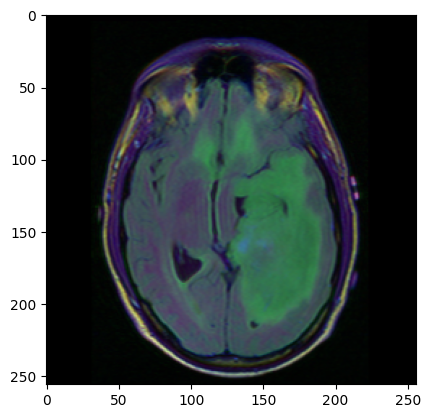

In [13]:
plt.imshow(main_img[1])
plt.show();

In [14]:
mask_array = np.array(mask_train)

## List of mask with tumor and mask with no tumor

In [15]:
mask_tumor_cell = [] 
No_mask_cell = []

for id_ in range(len(mask_array)):
    
    if mask_array[id_].max() == 1.0:
         cell = 1
         mask_tumor_cell.append(cell)
        
    else:
        cel = 0
        No_mask_cell.append(cel) 

print(f"Mask Tumor cells count: {len(mask_tumor_cell)}")
print(f"No Mask cells count: {len(No_mask_cell)}")


Mask Tumor cells count: 1342
No Mask cells count: 2504


In [16]:
mask_tumor_dict = {}
mask_tumor_dict["No_cell"] =len(No_mask_cell)
mask_tumor_dict["tumor_cell"] =len(mask_tumor_cell)
mask_tumor_dict.values()

dict_values([2504, 1342])

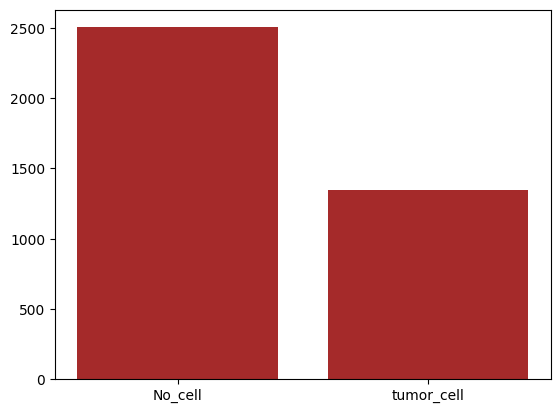

In [17]:
plt.bar(x = mask_tumor_dict.keys(),height = mask_tumor_dict.values(),color = "brown")
plt.show();

In [18]:
from skimage import io

## Tumor visualiztion with advance Techniques

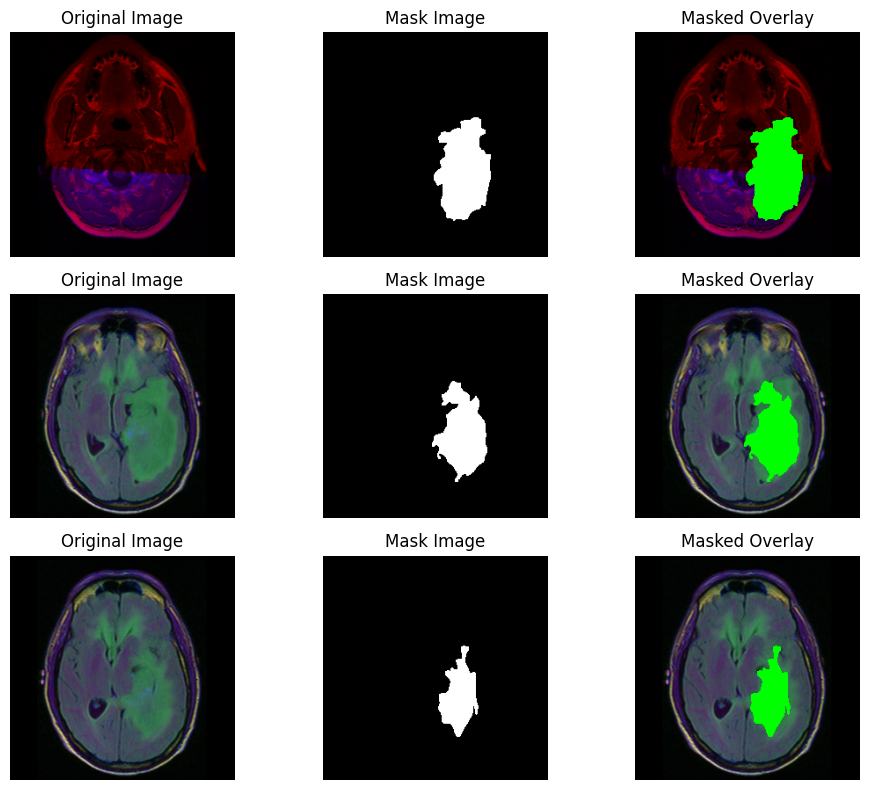

In [19]:

# Create a 3x3 grid for visualization
fig, ax = plt.subplots(3, 3, figsize=(10, 8))

for i in range(3): 
    # Read original image
    mage = io.imread(original_img[i])
    ax[i, 0].imshow(mage,)
    ax[i, 0].axis("off")  # Hide axis
    ax[i, 0].set_title("Original Image")

    # Read mask image
    mag = io.imread(mask_img[i])
    ax[i, 1].imshow(mag,cmap = "gray") 
    ax[i, 1].axis("off")
    ax[i, 1].set_title("Mask Image")

    # Apply mask coloring
    mage_colored = np.copy(mage) 
    mage_colored[mag == 255] = (0,255,0)  # Apply red color where mask is white
    ax[i, 2].imshow(mage_colored)
    ax[i, 2].axis("off")
    ax[i, 2].set_title("Masked Overlay")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [20]:
print(len(mask_array))

3846


In [21]:
from sklearn.utils import shuffle

## mask image with tumor to categorical variable 1 and no tumor to 0

In [22]:
Y = []
for id_ in range(len(mask_array)):
    
    if mask_array[id_].max() == 1.0:
         cell = 1
         Y.append(cell)
        
    else:
        cel = 0
        Y.append(cel)  # Fixed typo


In [23]:
combined = list(zip(main_img,mask_array))
print(len(combined))

3846


In [24]:

filtered_combined = [(img, mask) for img, mask in combined if np.any(mask == 1)]

# Unzip filtered pairs back into lists
filtered_main_img, filtered_mask_array = zip(*filtered_combined)

# Convert back to lists (optional)
filtered_main_img = list(filtered_main_img)
filtered_mask_array = list(filtered_mask_array)

print(f"Total images with tumors: {len(filtered_main_img)}")


Total images with tumors: 1342


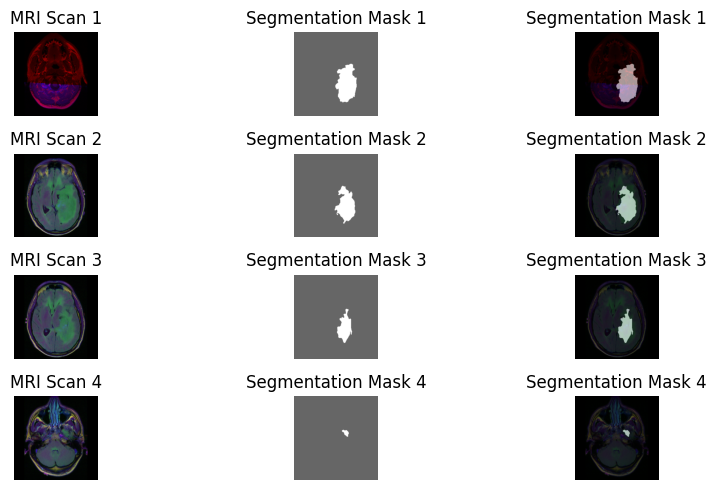

In [25]:
sub = filtered_combined[:4]

fig, axes = plt.subplots(len(sub), 3, figsize=(10, 5)) 

for i, (img_path, mask_path) in enumerate(sub):
    
    axes[i, 0].imshow(img_path, cmap="gray")
    axes[i, 0].set_title(f"MRI Scan {i+1}")
    axes[i, 0].axis("off")

    # Plot Mask
    axes[i, 1].imshow(mask_path, cmap="jet", alpha=0.6)  # Use 'jet' for better visualization
    axes[i, 1].set_title(f"Segmentation Mask {i+1}")
    axes[i, 1].axis("off")

    axes[i, 2].imshow(img_path, cmap="Blues")
    axes[i, 2].set_title(f"MRI Scan {i+1}")
    axes[i, 2].axis("off")

    # Plot Mask
    axes[i, 2].imshow(mask_path, cmap="jet", alpha=0.6)  # Use 'jet' for better visualization
    axes[i, 2].set_title(f"Segmentation Mask {i+1}")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()

In [26]:
print(len(filtered_combined))

1342


In [27]:
# Train_set = filtered_combined[:700]
# val_set = filtered_combined[700:1042]
# Test_set = filtered_combined[1042:]

# print(len(Train_set))
# print(len(val_set))
# print(len(Test_set))

In [28]:
X = mask_array

In [29]:
print(len(mask_array))
image_width = 256
image_height = 256
num_channel = 3

3846


In [30]:
from sklearn.model_selection import train_test_split

## reashaping the Y variable

In [31]:
# import random
# random.shuffle(combined)

# Split into train (70%), validation (20%), and test (10%)
train_set, temp_set = train_test_split(filtered_combined, test_size=0.3, random_state=42)
val_set, test_set = train_test_split(temp_set, test_size=0.33, random_state=42)  # 10% test, 20% val

print(len(train_set), "train samples")
print(len(val_set), "validation samples")
print(len(test_set), "test samples")


939 train samples
270 validation samples
133 test samples


In [32]:
print(f"Train set: {len(train_set)} samples")
print(f"Validation set: {len(val_set)} samples")
print(f"Test set: {len(test_set)} samples")
print(train_set[0][0].shape)
print(val_set[0][0].shape)
print(test_set[0][0].shape)

Train set: 939 samples
Validation set: 270 samples
Test set: 133 samples
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


## U-NET From Scratch

In [33]:
# import libraries
import tensorflow as tf


In [34]:

image_width = 256
image_height = 256
num_channel = 3

inputs = tf.keras.Input(shape=(image_width, image_height, num_channel))

conv_1 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
dropout_1 = tf.keras.layers.Dropout(0.2)(conv_1)
conv_2 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(dropout_1)

maxpool_1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(conv_2)
conv_3 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(maxpool_1)
dropout_2 = tf.keras.layers.Dropout(0.2)(conv_3)
conv_4 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(dropout_2)

maxpool_2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(conv_4)
conv_5 = tf.keras.layers.Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(maxpool_2)
dropout_3 = tf.keras.layers.Dropout(0.2)(conv_5)
conv_6 = tf.keras.layers.Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(dropout_3)

maxpool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(conv_6)
conv_7 = tf.keras.layers.Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(maxpool_3)
dropout_4 = tf.keras.layers.Dropout(0.2)(conv_7)
conv_8 = tf.keras.layers.Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(dropout_4)

maxpool_4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(conv_8)
conv_9 = tf.keras.layers.Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(maxpool_4)

# Transpose convolution
conv_1_T = tf.keras.layers.Conv2DTranspose(128, (3,3), strides=(2,2),activation="relu", kernel_initializer="he_normal", padding="same")(conv_9)
concat_1 = tf.keras.layers.concatenate([conv_1_T, conv_8])
conv_11_rev = tf.keras.layers.Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(concat_1) 
dropout_5 = tf.keras.layers.Dropout(0.3)(conv_11_rev)
conv_12_rev = tf.keras.layers.Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(dropout_5) 

conv_2_T = tf.keras.layers.Conv2DTranspose(64, (3,3),strides=(2,2), activation="relu", kernel_initializer="he_normal", padding="same")(conv_12_rev)
concat_2 = tf.keras.layers.concatenate([conv_2_T, conv_6])
conv_13_rev = tf.keras.layers.Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(concat_2)
dropout_6 = tf.keras.layers.Dropout(0.3)(conv_13_rev)
conv_14_rev = tf.keras.layers.Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(dropout_6)

conv_3_T = tf.keras.layers.Conv2DTranspose(32, (3,3),strides=(2,2), activation="relu", kernel_initializer="he_normal", padding="same")(conv_14_rev)
concat_3 = tf.keras.layers.concatenate([conv_3_T, conv_4])
conv_15_rev = tf.keras.layers.Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(concat_3)
dropout_7 = tf.keras.layers.Dropout(0.3)(conv_15_rev)   
conv_16_rev = tf.keras.layers.Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(dropout_7)

conv_4_T = tf.keras.layers.Conv2DTranspose(16, (3,3),strides=(2,2), activation="relu", kernel_initializer="he_normal", padding="same")(conv_16_rev)
concat_4 = tf.keras.layers.concatenate([conv_4_T, conv_2])
conv_17_rev = tf.keras.layers.Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(concat_4)
dropout_8 = tf.keras.layers.Dropout(0.3)(conv_17_rev)     
conv_18_rev = tf.keras.layers.Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(dropout_8)

outputs = tf.keras.layers.Conv2D(1, (1,1),activation="sigmoid")(conv_18_rev)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

import keras.backend as K

def dice_loss(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)  # Flatten to 1D
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)  # Compute intersection
    return 1 - (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Compile the model with Dice Loss
model.compile(optimizer="adam", loss=dice_loss, metrics=["accuracy"])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [35]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = "SAV.h5",verbose = 1, save_best_only = True)
calls = tf.keras.callbacks.EarlyStopping( monitor="loss", patience=1)

In [36]:
# Unzip train_data into images (X) and masks (Y)
X_train, Y_train = zip(*train_set)
X_val, Y_val = zip(*val_set)

# # Convert to NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

# # Convert masks to grayscale (single-channel)
Y_train = np.expand_dims(np.mean(Y_train, axis=-1), axis=-1)
Y_val = np.expand_dims(np.mean(Y_val, axis=-1), axis=-1)

print(Y_train.shape)
print(X_train.shape)
print(Y_val.shape)
print(X_val.shape)

(939, 256, 256, 1)
(939, 256, 256, 3)
(270, 256, 256, 1)
(270, 256, 256, 3)


In [37]:

# Train model
mod_1 = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 5, batch_size=10)


Epoch 1/5
94/94 [==============================] - 748s 8s/step - loss: 0.7295 - accuracy: 0.8069 - val_loss: 0.5191 - val_accuracy: 0.9550
Epoch 2/5
94/94 [==============================] - 666s 7s/step - loss: 0.4759 - accuracy: 0.9715 - val_loss: 0.4532 - val_accuracy: 0.9766
Epoch 3/5
94/94 [==============================] - 628s 7s/step - loss: 0.4850 - accuracy: 0.9683 - val_loss: 0.5413 - val_accuracy: 0.9486
Epoch 4/5
94/94 [==============================] - 605s 6s/step - loss: 0.4615 - accuracy: 0.9731 - val_loss: 0.4203 - val_accuracy: 0.9749
Epoch 5/5
94/94 [==============================] - 592s 6s/step - loss: 0.4615 - accuracy: 0.9733 - val_loss: 0.4940 - val_accuracy: 0.9593


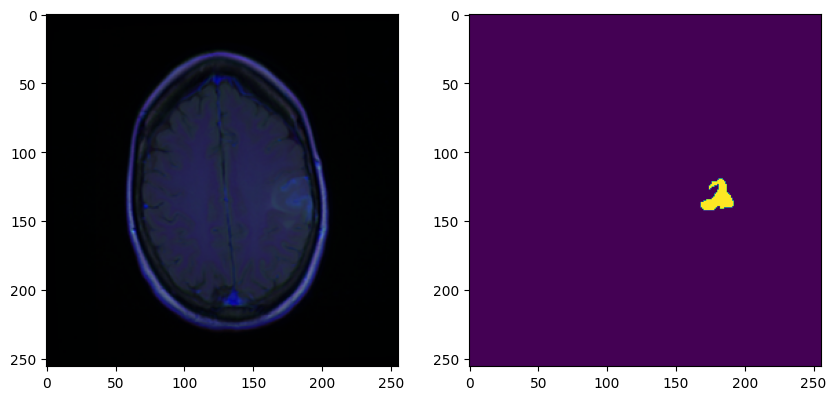

In [38]:
fig, ax = plt.subplots(1,2, figsize = (10,8))
ax[0].imshow(X_train[0])
ax[1].imshow(Y_train[0])
plt.show();

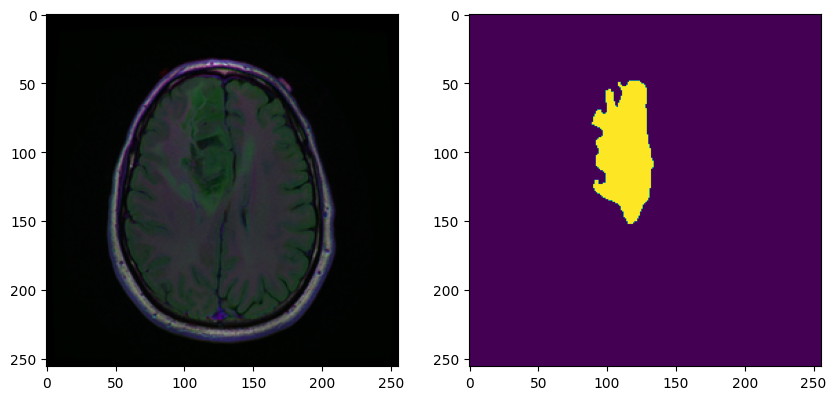

In [39]:
fig, nx = plt.subplots(1,2, figsize = (10,8))
nx[0].imshow(X_val[0])
nx[1].imshow(Y_val[0])
plt.show();

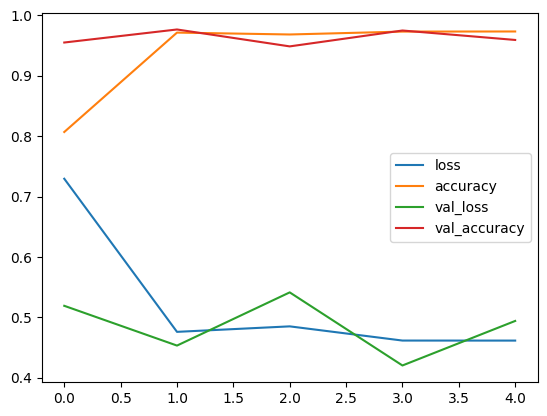

In [40]:
pd.DataFrame(mod_1.history).plot()
plt.show();

In [41]:

X_test,Y_test = zip(*test_set)

#convert to array
X_test = np.array(X_test)
Y_tast = np.array(Y_test)
Y_test = np.array(Y_test)

Y_tast = np.expand_dims(np.mean(Y_tast,axis = -1),axis = -1)

print(Y_tast.shape)
print(X_test.shape)
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️")
print(Y_test.shape)


(133, 256, 256, 1)
(133, 256, 256, 3)
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️🙅‍♂️
(133, 256, 256, 3)


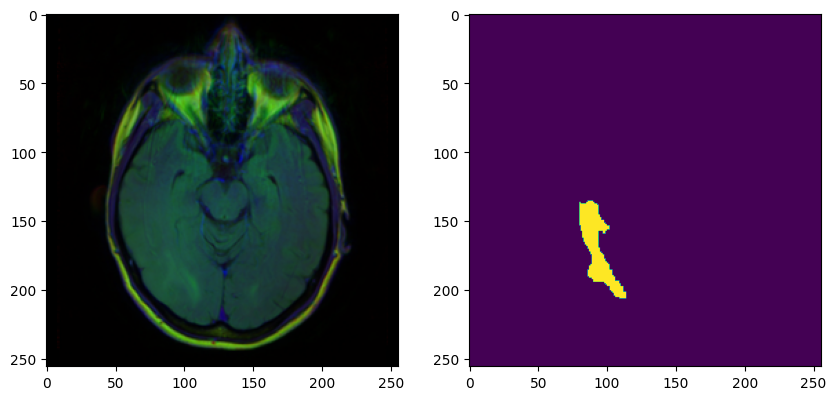

In [42]:
fig, ax= plt.subplots(1,2, figsize = (10,8))
ax[0].imshow(X_test[0])
ax[1].imshow(Y_tast[0])
plt.show();

In [43]:
model.evaluate(X_test,Y_tast)

5/5 [==============================] - 16s 3s/step - loss: 0.5598 - accuracy: 0.9477


[0.5597755312919617, 0.9476982355117798]

In [44]:
mod_pred = model.predict(X_test)

5/5 [==============================] - 17s 3s/step


In [45]:
print(mod_pred.shape)
print(X_test.shape)

(133, 256, 256, 1)
(133, 256, 256, 3)


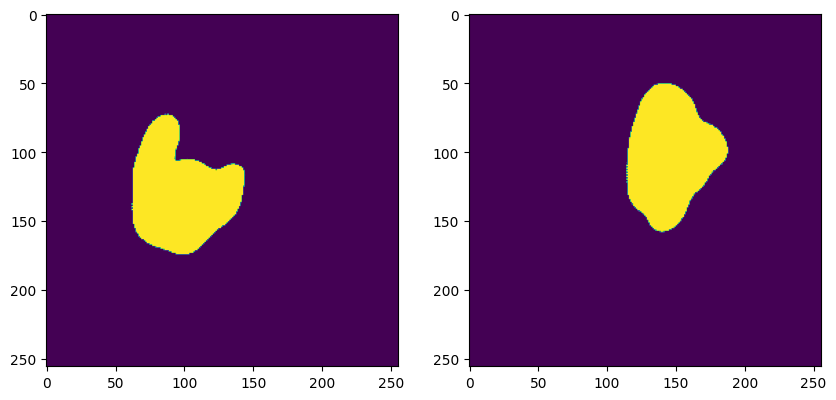

In [46]:
fig, ax= plt.subplots(1,2, figsize = (10,8))
ax[0].imshow(mod_pred[42])
ax[1].imshow(mod_pred[25])
plt.show();

In [47]:
print(mod_pred.shape)
print(Y_train.shape)
print(Y_tast.shape)
print(X_train.shape)
print(X_test.shape)

(133, 256, 256, 1)
(939, 256, 256, 1)
(133, 256, 256, 1)
(939, 256, 256, 3)
(133, 256, 256, 3)


In [48]:


mod_pred = np.array(mod_pred)  
mod_pred = (mod_pred > 0.3).astype(np.uint8)  

# Convert ground truth mask to integer
Y_tast = tf.squeeze(Y_tast).numpy().astype(int)

# Select first 300 predictions for comparison
label_pred = mod_pred[:300]


In [49]:
print("Min prediction:", np.min(mod_pred))
print("Max prediction:", np.max(mod_pred))
print("Mean prediction:", np.mean(mod_pred))


Min prediction: 0
Max prediction: 1
Mean prediction: 0.061440145162711464


In [50]:
print(np.unique(Y_train))
print(np.unique(Y_test))
print(np.unique(Y_val))
print(np.unique(mod_pred))

[0. 1.]
[0. 1.]
[0. 1.]
[0 1]


## Visualizing the model results

In [51]:

Y_true = tf.squeeze(Y_tast.reshape(-1,1)).numpy().astype(dtype = int)
Y_pred = tf.squeeze(mod_pred.reshape(-1,1)).numpy()
print(Y_true[:10])
print(Y_pred[:10])

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


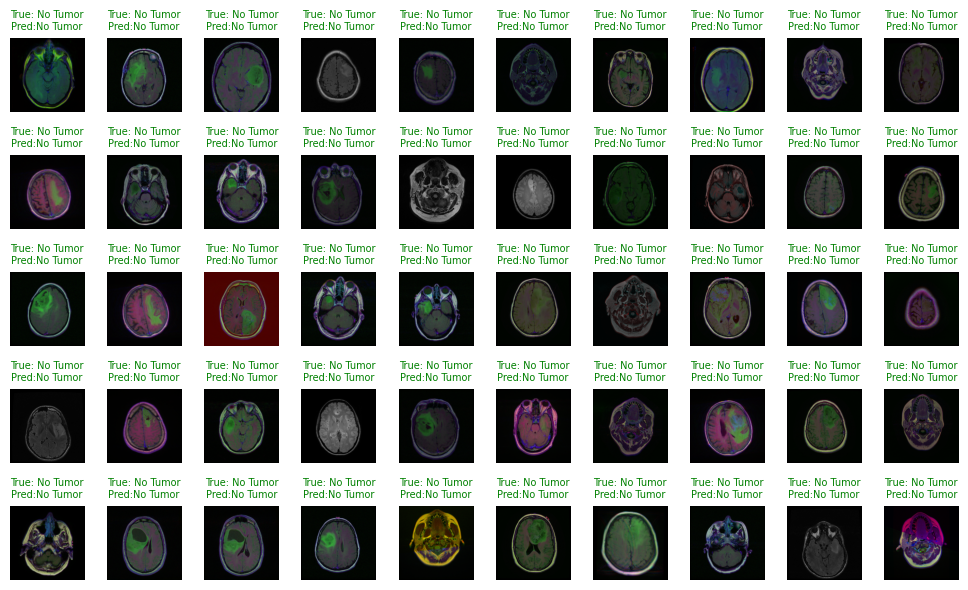

In [52]:
Tumor = ["No Tumor", "Tumor"]
plt.figure(figsize = (10,6))
for i in range(50):
    plt.subplot(5,10,i + 1)
    plt.imshow(X_test[i])

    True_val = Tumor[Y_true[i]]
    pred_val = Tumor[Y_pred[i]] 
    labels = "green" if True_val == pred_val else "red"
    plt.title(f"True: {True_val}\nPred:{pred_val}",color = labels,fontsize = 7)
    plt.axis("off")
    plt.tight_layout()
plt.show();

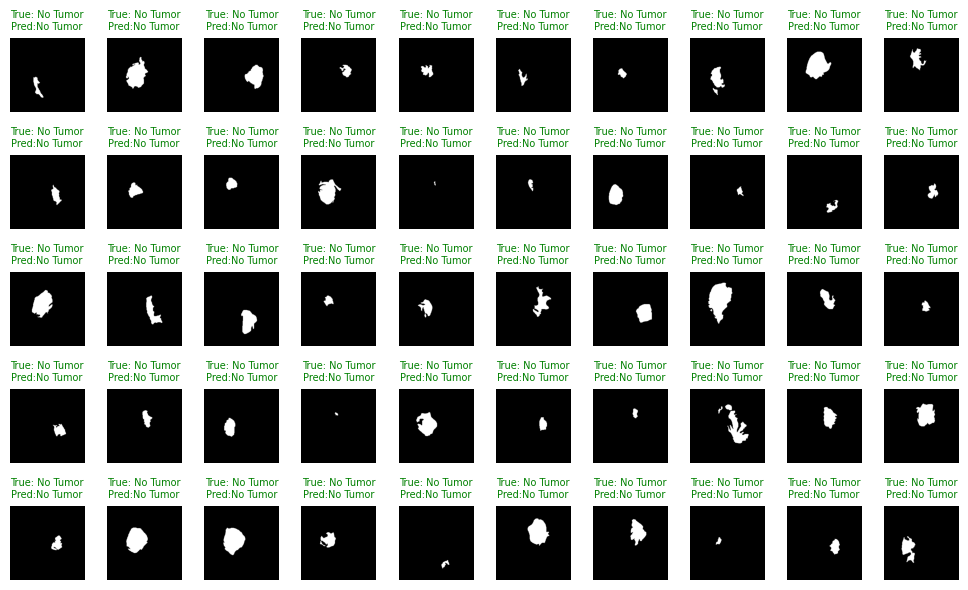

In [53]:
Tumor = ["No Tumor", "Tumor"]
plt.figure(figsize = (10,6))
for i in range(50):
    plt.subplot(5,10,i + 1)
    plt.imshow(Y_test[i])

    True_val = Tumor[Y_true[i]]
    pred_val = Tumor[Y_pred[i]] 
    labels = "green" if True_val == pred_val else "red"
    plt.title(f"True: {True_val}\nPred:{pred_val}",color = labels,fontsize = 7)
    plt.axis("off")
    plt.tight_layout()
plt.show();

In [54]:
print(Y_train.shape)
print(Y_test.shape)

(939, 256, 256, 1)
(133, 256, 256, 3)


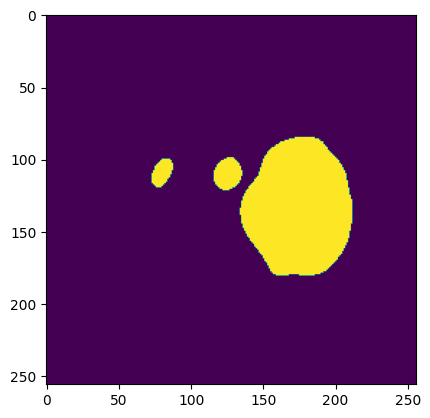

In [55]:
plt.imshow(mod_pred[2])

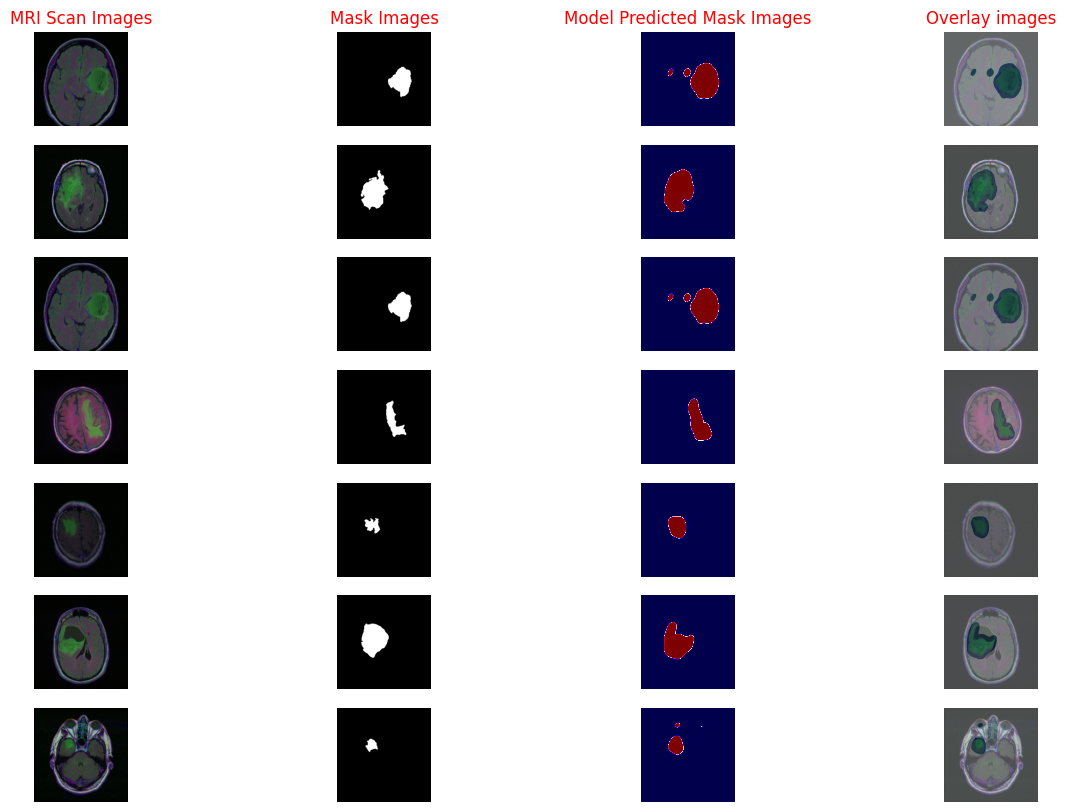

In [62]:
fig,ax = plt.subplots(7,4,figsize = (15,10))
ax[0,0].imshow(X_test[2])
ax[0,1].imshow(Y_test[2])
ax[0,2].imshow(mod_pred[2],cmap = "seismic")
ax[0,3].imshow(X_test[2],cmap = "seismic")
ax[0,3].imshow(mod_pred[2],cmap = "Blues",alpha=0.4)
ax[0,0].set_title("MRI Scan Images",color = "red")
ax[0,1].set_title("Mask Images",color = "red")
ax[0,2].set_title("Model Predicted Mask Images",color = "red")
ax[0,3].set_title("Overlay images",color = "red")

ax[1,0].imshow(X_test[1])
ax[1,1].imshow(Y_test[1])
ax[1,2].imshow(mod_pred[1],cmap = "seismic")
ax[1,3].imshow(X_test[1])
ax[1,3].imshow(mod_pred[1],cmap = "Blues",alpha=0.3)


ax[2,0].imshow(X_test[2])
ax[2,1].imshow(Y_test[2])
ax[2,2].imshow(mod_pred[2],cmap = "seismic")
ax[2,3].imshow(X_test[2])
ax[2,3].imshow(mod_pred[2],cmap = "Blues",alpha=0.3)


ax[3,0].imshow(X_test[21])
ax[3,1].imshow(Y_test[21])
ax[3,2].imshow(mod_pred[21],cmap = "seismic")
ax[3,3].imshow(X_test[21])
ax[3,3].imshow(mod_pred[21],cmap = "Blues",alpha=0.3)               

ax[4,0].imshow(X_test[4])
ax[4,1].imshow(Y_test[4])
ax[4,2].imshow(mod_pred[4],cmap = "seismic")
ax[4,3].imshow(X_test[4])
ax[4,3].imshow(mod_pred[4],cmap = "Blues",alpha=0.3)               

ax[5,0].imshow(X_test[42])
ax[5,1].imshow(Y_test[42])
ax[5,2].imshow(mod_pred[42],cmap = "seismic")
ax[5,3].imshow(X_test[42])
ax[5,3].imshow(mod_pred[42],cmap = "Blues",alpha=0.3)

ax[6,0].imshow(X_test[23])
ax[6,1].imshow(Y_test[23])
ax[6,2].imshow(mod_pred[23],cmap = "seismic")
ax[6,3].imshow(X_test[23])
ax[6,3].imshow(mod_pred[23],cmap = "Blues",alpha=0.3)               

for row in ax:
    
    for subplot in row:
        subplot.axis("off")  
        
        
plt.show()

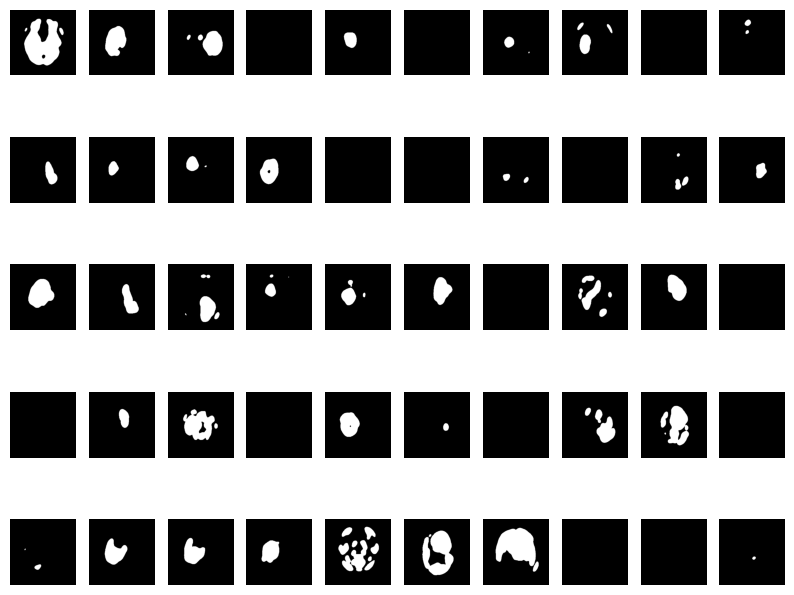

In [57]:
plt.figure(figsize = (10,8))

for i in range(50):
    plt.subplot(5,10, i + 1)

    plt.imshow(mod_pred[i],cmap = "gray")
    plt.axis("off")
plt.show();

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
report_mat = classification_report(Y_true,Y_pred)


In [60]:
print(report_mat)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97   8451099
           1       0.32      0.65      0.43    265189

    accuracy                           0.95   8716288
   macro avg       0.66      0.80      0.70   8716288
weighted avg       0.97      0.95      0.96   8716288

